***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
print(dados.Renda.min())
print(dados.Renda.max())
sm = 788
classes = [0, sm*2, sm*5, sm*15, sm*25, 200000]
classes

0
200000


[0, 1576, 3940, 11820, 19700, 200000]

In [5]:
classes = [0, 1576, 3940, 11820, 19700, 200000]


### 2º Definir os labels das classes

In [6]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [7]:
frequencia = pd.value_counts(pd.cut(x=dados.Renda,
                                    bins = classes, labels=labels, include_lowest=True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
selecao = pd.cut(x=dados.Renda, bins = classes, labels = labels, include_lowest = True)
percentual = selecao.value_counts(normalize=True)*100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
tabela_de_frequencia = pd.DataFrame(data = {'Frequência': frequencia, 'Percentual': percentual})
tabela_de_frequencia.sort_index(ascending=False, inplace=True)
tabela_de_frequencia.reset_index(level=0, inplace=True)
tabela_de_frequencia.rename(columns={'index':'Classe'}, inplace=True)
tabela_de_frequencia

,Classe,Frequência,Percentual
0,A,420,0.546590
1,B,822,1.069755
2,C,7241,9.423477
3,D,18602,24.208745
4,E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

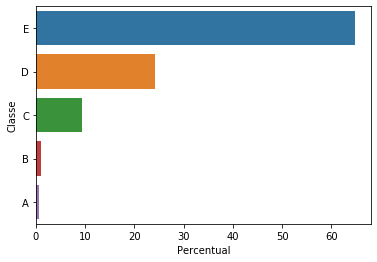

In [10]:
sns.barplot(x='Percentual', y='Classe', data=tabela_de_frequencia)

> ### Conclusões

Escreva suas conclusões aqui...
A partir da tabela de distribuição de frequências e o gráfico feito acima, pode-se observar que a maior parte da amostra de encontra na classe 'E', enquanto que menos de 1% dos entrevistados se encontram na classe A. Além disso, é notório perceber que a variável Classe é inversamente proporcional em relação a variável Frequência.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

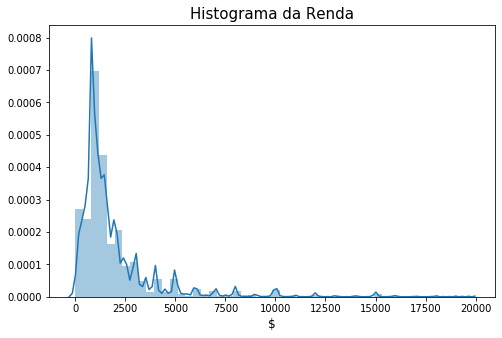

In [11]:
ax = sns.distplot(dados.query('Renda<20000').Renda)
ax.figure.set_size_inches(8,5)
ax.set_title('Histograma da Renda', fontsize=15)
ax.set_xlabel('$',fontsize=12)
ax

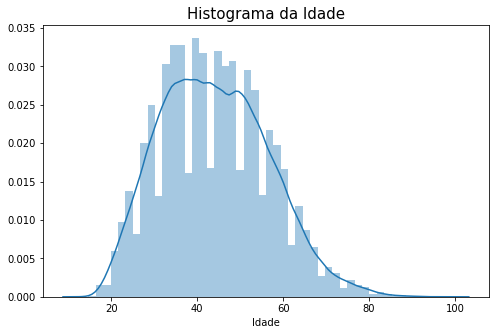

In [12]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(8,5)
ax.set_title('Histograma da Idade', fontsize=15)
ax

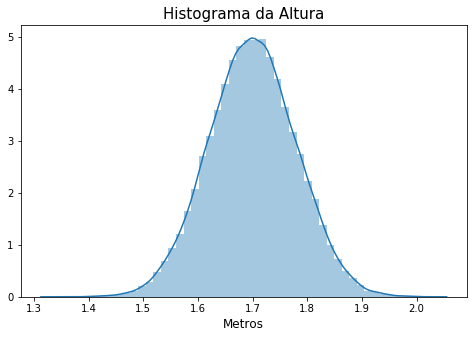

In [13]:
ax=sns.distplot(dados.Altura)
ax.figure.set_size_inches(8,5)
ax.set_title('Histograma da Altura',fontsize=15)
ax.set_xlabel('Metros',fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...
Primeiramente, no histograma de Renda havia um dados exuberante no qual foi removido para melhor visualização dos dados de uma maneira geral, sendo assim, observa-se uma assimetria a direita decorrente do fato de que muitas pessoas tem uma renda de 0  a 2500 reais. Já em relação ao segundo histograma, pode-se concluir que a distribuição segue o formato parecido com a de uma Normal, mas para termos certeza teríamos que fazer testes estatísticos. É percerptível também que os chefes de família tem mais entre 30 e 55 anos. Por último, o histograma de Altura segue uma normal com média em 1,7 metros.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [15]:
tabela_cruzada = pd.crosstab(dados.Sexo, dados.Cor)
tabela_cruzada.rename(columns=cor, inplace=True)
tabela_cruzada.rename(index=sexo, inplace=True)
tabela_cruzada

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


> ### Conclusões

Escreva suas conclusões aqui...
Através da tabela cruzada acima, pode-se tirar conclusões preciosas, tais como que os homens pardos são a maior parte da amostra enquanto que as mulheres indígenas são a menor parte dessa amostra.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [16]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [17]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [18]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [19]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [20]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [21]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [22]:

stats_renda_por_sexo_cor = pd.crosstab(dados.Cor,
                                          dados.Sexo,
                                          values=dados.Renda,
                                          aggfunc = {'mean','median','max'})
stats_renda_por_sexo_cor.rename(columns= sexo, inplace=True)
stats_renda_por_sexo_cor.rename(index=cor, inplace=True)
stats_renda_por_sexo_cor.round(2)

max                mean             median         
Sexo     Masculino  Feminino Masculino Feminino Masculino Feminino
Cor                                                               
Indígena   10000.0  120000.0   1081.71  2464.39     797.5    788.0
Branca    200000.0  100000.0   2925.74  2109.87    1700.0   1200.0
Preta      50000.0   23000.0   1603.86  1134.60    1200.0    800.0
Amarela    50000.0   20000.0   4758.25  3027.34    2800.0   1500.0
Parda     100000.0   30000.0   1659.58  1176.76    1200.0    800.0

> ### Conclusões

Escreva suas conclusões aqui...
    Através da tabela acima, é notório perceber que a média de renda do sexo Masculino em qualquer raça, exceto na Indígena, é bem maior que a de sexo Feminino desta mesma raça, contudo, as pessoas de sexo Feminino que são amarelas e brancas, tem a média de renda maior que as do sexo Masculino da cor Parda, Preta e Indígena. 
    Somado a isso, observando particularmente a variável Indígena em relação a suas estatísticas de cada sexo, pode-se concluir que a média e o valor máximo de renda Feminino é maior que as do Masculino, mas com o valor da mediana menor em relação ao mesmo. Isso indica que a renda das mulheres têm valores mais dispersos do que os homens, que têm valores mais próximos uns dos outros.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [25]:
stats2_renda_por_sexo_cor = pd.crosstab(dados.Cor, dados.Sexo,
                                       values=dados.Renda,
                                       aggfunc={'mad','var','std'})
stats2_renda_por_sexo_cor.rename(columns=sexo, inplace=True)
stats2_renda_por_sexo_cor.rename(index=cor, inplace=True)
stats2_renda_por_sexo_cor.round(2)


mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

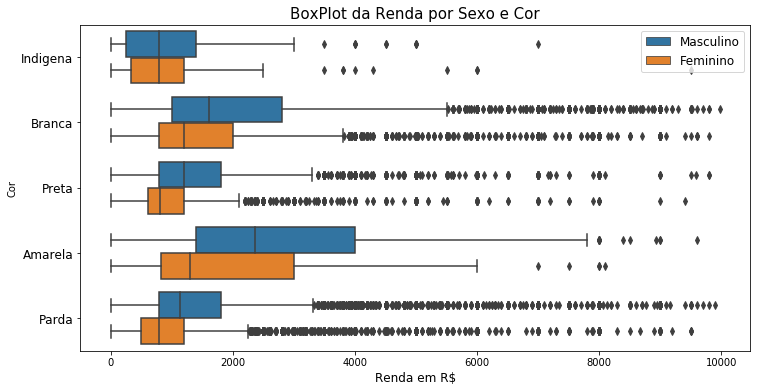

In [45]:
ax = sns.boxplot(x='Renda', y='Cor', hue='Sexo', data = dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('BoxPlot da Renda por Sexo e Cor', fontsize=15)
ax.set_xlabel('Renda em R$', fontsize=12)
ax.set_yticklabels(['Indigena','Branca','Preta','Amarela','Parda','Sem declaração'],
                  fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles,['Masculino','Feminino'], fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [52]:
from scipy import stats
percentual = stats.percentileofscore(dados.Renda, 788, kind='weak')
print('{:.2f}% das pessoas ganham um slário mínimo ou menos'.format(percentual))

28.87% das pessoas ganham um slário mínimo ou menos


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [53]:
valor = dados.Renda.quantile(.99)
print('R$ {:.2f}'.format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [61]:
stats_renda_por_estudo_sexo = pd.crosstab(index=dados['Anos de Estudo'], columns=dados.Sexo, values=dados.Renda,
                                         aggfunc={'mean','max','std'})
stats_renda_por_estudo_sexo.rename(columns=sexo, inplace=True)
stats_renda_por_estudo_sexo.rename(index=anos_de_estudo, inplace=True)
stats_renda_por_estudo_sexo

max                   mean               \
Sexo                           Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   30000.0   10000.0   799.494638   516.201748   
1 ano                            30000.0    2000.0   895.629047   492.771987   
2 anos                           40000.0    4000.0   931.178986   529.911638   
3 anos                           80000.0    3500.0  1109.203862   546.853916   
4 anos                           50000.0   10000.0  1302.329283   704.279111   
5 anos                           35000.0    8000.0  1338.653218   781.389776   
6 anos                           25000.0    6000.0  1448.875419   833.732824   
7 anos                           40000.0    9000.0  1465.497940   830.751004   
8 anos                           30000.0   18000.0  1639.396667   933.615351   
9 anos                           60000.0   20000.0  1508.038850   868.021700   
10 anos                          45000.0    6000.0  1731.270847   925.919225   
11 anos                         200000.0  100000.0  2117.060504  1286.790889   
12 anos                          30000.0  120000.0  2470.330776  1682.313725   
13 anos                          25000.0   20000.0  3195.099154  1911.730047   
14 anos                          50000.0   20000.0  3706.620269  2226.460457   
15 anos ou mais                 200000.0  100000.0  6134.279790  3899.513231   
Não determinados                  7000.0    3000.0  1295.761905   798.174419   

                                        std               
Sexo                              Masculino     Feminino  
Anos de Estudo                                            
Sem instrução e menos de 1 ano  1023.904884   639.311534  
1 ano                           1331.950552   425.291842  
2 anos                          1435.173827   498.234168  
3 anos                          2143.800133   424.124446  
4 anos                          1419.821787   629.553397  
5 anos                          1484.650587   635.782641  
6 anos                          1476.628602   574.547028  
7 anos                          1419.708673   602.038029  
8 anos                          1515.583715   896.781213  
9 anos                          2137.664774   973.221652  
10 anos                         2078.609734   620.611907  
11 anos                         2676.538942  1819.040417  
12 anos                         2268.081538  4851.833513  
13 anos                         2797.116800  2053.789771  
14 anos                         3987.214974  2064.083336  
15 anos ou mais                 7447.613594  4212.770709  
Não determinados                 979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

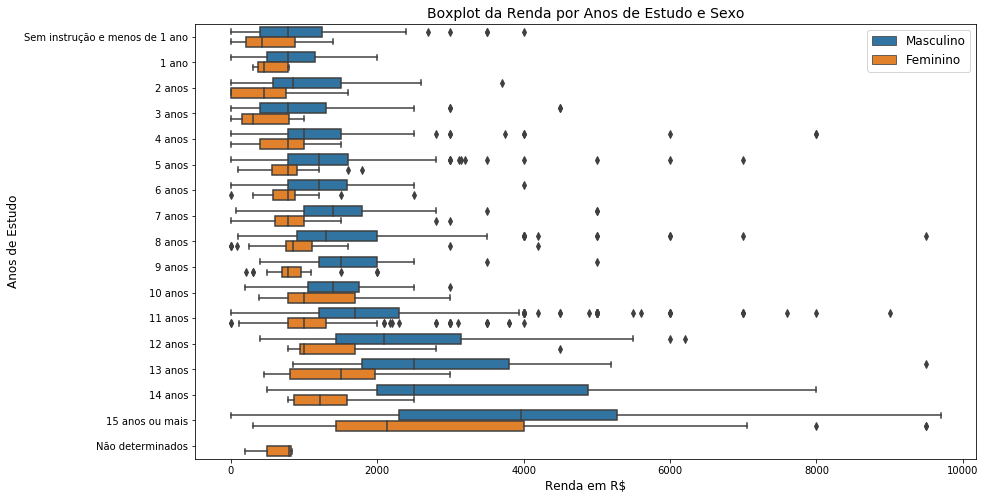

In [107]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', data=dados.query('Renda<10000 and Idade == 40'), orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Boxplot da Renda por Anos de Estudo e Sexo', fontsize=14)
ax.set_xlabel('Renda em R$', fontsize=12)
ax.set_ylabel('Anos de Estudo', fontsize=12)
ax.set_yticklabels([key for key in anos_de_estudo.values()])
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles,['Masculino','Feminino'],fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [84]:
stats_renda_por_UF = dados.groupby(['UF']).agg({'Renda':['mean','median','std']})
stats_renda_por_UF.rename(index=uf)
stats_renda_por_UF.round(2)

Renda                
       mean median      std
UF                         
11  1789.76   1200  2406.16
12  1506.09    900  2276.23
13  1445.13    900  1757.94
14  1783.59   1000  2079.66
15  1399.08    850  2053.78
16  1861.35   1200  2020.69
17  1771.09   1000  2934.59
21  1019.43    700  1887.82
22  1074.55    750  2373.36
23  1255.40    789  1821.96
24  1344.72    800  1651.81
25  1293.37    788  1950.27
26  1527.08    900  2389.62
27  1144.55    788  1237.86
28  1109.11    788  1479.00
29  1429.65    800  3507.92
31  2056.43   1200  3584.72
32  2026.38   1274  3513.85
33  2496.40   1400  5214.58
35  2638.10   1600  3503.78
41  2493.87   1500  4302.94
42  2470.85   1800  3137.65
43  2315.16   1500  2913.34
50  2262.60   1500  3031.42
51  2130.65   1500  2542.63
52  1994.58   1500  2221.93
53  4241.95   2000  5550.46

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

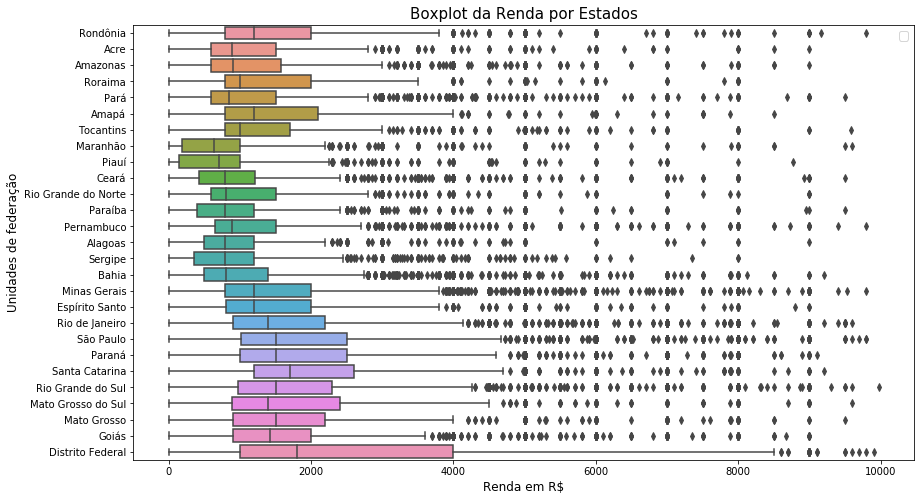

In [110]:
ax = sns.boxplot(x='Renda', y='UF', data=dados.query('Renda<10000'), orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Boxplot da Renda por Estados', fontsize=15)
ax.set_xlabel('Renda em R$', fontsize=12)
ax.set_ylabel('Unidades de federação', fontsize=12)
ax.set_yticklabels([key for key in uf.values()])
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles,['Masculino','Feminino'],fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...
    Com o gráfico Boxplot fica destacado a observação de vários outliers de tem que ser analisados mais específicamente, mas em relação aos Estados, observa-se que o Distrito Federal tem a maior mediana, maior máximo e maior limite superior de Renda em R$ do Brasil, o que indica que quem mora lá tem salários superiores a outros estados do país.